In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
import numpy as np
from tensorflow import keras
import time
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from __future__ import division
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
dt = pd.read_csv('SVMData/test_feat.csv', index_col=0)

In [3]:
datasetCompare = dt.sample(10000)
datasetCompare

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,truth,username,course_id,age,gender,education,user_enroll_num,course_enroll_num,cluster_label,course_category
enroll_id,,,,,,,,,,,,,,,,,,,,,
218661,-0.227150,-0.227150,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.036598,-0.305844,-0.013096,...,0,4442083,course-v1:TsinghuaX+01030132X+2016_T2,-0.599969,1,2,-0.271904,-0.878947,1,0
428404,-0.219727,-0.219727,-0.243043,-0.296739,-0.333535,-0.059298,-0.409566,-0.033690,-0.305844,-0.202161,...,1,232304,TsinghuaX/34100325X/2015_T1,1.432103,1,3,0.168634,-0.112467,0,0
17105,-0.228387,-0.228387,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.042412,-0.305844,-0.202161,...,1,4581547,course-v1:TsinghuaX+JRFX01+2016--T2,-0.599969,0,0,-0.271904,-0.809098,2,0
304143,-0.129424,-0.129424,0.119028,-0.200993,-0.145922,-0.049768,-0.123956,-0.042412,-0.305844,-0.202161,...,1,2680293,course-v1:TsinghuaX+00690092X+2016_T1,-0.599969,0,0,-0.271904,-0.478478,2,0
348782,-0.204883,-0.204883,-0.243043,-0.296739,-0.283505,-0.059298,-0.373865,-0.042412,-0.305844,-0.202161,...,1,3627809,course-v1:TsinghuaX+00740123X+2016_TS,-0.599969,0,0,-0.271904,-0.703858,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91642,-0.110869,-0.110869,-0.200446,-0.269383,-0.308520,-0.059298,-0.231060,0.056431,0.260205,-0.202161,...,0,514228,TsinghuaX/00690342X/2015_T1,-0.599969,0,0,-0.360012,-0.309908,2,0
176938,-0.016854,-0.016854,-0.179148,0.387158,0.216796,-0.046592,0.304459,-0.013340,0.033785,-0.202161,...,1,268202,TsinghuaX/80515522X/2015_T1,1.649825,1,1,-0.007581,-0.240990,3,0
105096,-0.218490,-0.218490,-0.221745,-0.255705,-0.296012,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,1,1017422,course-v1:TsinghuaX+30240233X_2015_T2+2015_T2,-0.599969,0,0,0.521064,-0.608863,0,0


In [4]:
def compare(group, data):
    return data.groupby([group])['truth'].sum()*100/data.groupby([group])['truth'].count()
compare("cluster_label", datasetCompare)

cluster_label
0    80.984952
1    33.217993
2    79.174240
3    72.388956
4    32.359551
Name: truth, dtype: float64

In [5]:
###Ranking Important Features
compare("education", datasetCompare)

education
0    76.623761
1    74.476744
2    60.355030
3    76.791277
4    62.500000
5    83.870968
6    71.255061
7    79.487179
Name: truth, dtype: float64

In [10]:
compare("gender", datasetCompare)

gender
0    79.024728
1    71.648427
2    67.130704
Name: truth, dtype: float64

In [11]:

compare("age", datasetCompare)


age
-0.599969     76.613356
 0.416067     66.666667
 0.488641    100.000000
 0.561215     33.333333
 0.633789    100.000000
 0.706363     66.666667
 0.778937     69.565217
 0.851511     61.111111
 0.924085     54.054054
 0.996659     56.481481
 1.069233     68.032787
 1.141807     78.504673
 1.214381     79.702970
 1.286955     81.720430
 1.359529     84.246575
 1.432103     77.551020
 1.504677     73.770492
 1.577251     74.576271
 1.649825     74.561404
 1.722399     79.569892
 1.794973     80.000000
 1.867547     78.947368
 1.940121     65.573770
 2.012695     85.915493
 2.085269     77.358491
 2.157843     71.153846
 2.230417     68.421053
 2.302991     77.777778
 2.375565     64.444444
 2.448139     60.526316
 2.520713    100.000000
 2.593287     44.444444
 2.665861     47.826087
 2.738435     57.692308
 2.811009     73.333333
 2.883583     72.727273
 2.956157     66.666667
 3.028731     58.333333
 3.101305     80.000000
 3.173879     60.000000
 3.246453     91.666667
 3.319027   

In [12]:
dataset = dt.sample(20000)
dataset
dataset = pd.get_dummies(dataset, columns=['gender'])
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,course_id,age,education,user_enroll_num,course_enroll_num,cluster_label,course_category,gender_0,gender_1,gender_2
enroll_id,,,,,,,,,,,,,,,,,,,,,
273850,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.036598,-0.305844,0.175968,...,course-v1:TsinghuaX+30240184_2X+2016_T1,1.432103,6,-0.360012,-0.838900,2,0,0,1,0
418224,-0.208594,-0.208594,-0.243043,-0.283061,-0.283505,-0.059298,-0.373865,-0.042412,-0.305844,-0.202161,...,course-v1:TsinghuaX+00510888X+2016_T1,-0.599969,0,-0.360012,-0.936689,2,0,1,0,0
378289,0.406210,0.406210,1.567314,1.166801,0.904709,-0.054533,0.697172,0.036081,1.335696,-0.202161,...,course-v1:TsinghuaX+30640014+2015_T2,-0.599969,0,-0.360012,1.500587,2,0,1,0,0
399409,-0.209831,-0.209831,-0.243043,-0.283061,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,course-v1:TsinghuaX+90640012X+2016_T1,-0.599969,0,-0.360012,0.264719,2,0,1,0,0
180702,-0.224675,-0.224675,-0.243043,-0.283061,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,TsinghuaX/00680082X/2016_T1,0.996659,2,0.785387,-0.801647,2,0,0,0,1


In [13]:
dataset = pd.get_dummies(dataset, columns=['education'])
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,gender_1,gender_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7
enroll_id,,,,,,,,,,,,,,,,,,,,,
273850,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.036598,-0.305844,0.175968,...,1,0,0,0,0,0,0,0,1,0
418224,-0.208594,-0.208594,-0.243043,-0.283061,-0.283505,-0.059298,-0.373865,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
378289,0.406210,0.406210,1.567314,1.166801,0.904709,-0.054533,0.697172,0.036081,1.335696,-0.202161,...,0,0,1,0,0,0,0,0,0,0
399409,-0.209831,-0.209831,-0.243043,-0.283061,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
180702,-0.224675,-0.224675,-0.243043,-0.283061,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,0,1,0,0,1,0,0,0,0,0


In [14]:
target = dataset.pop('truth')
trash= dataset.pop('course_id')
trash2= dataset.pop('course_category')
trash3 = dataset.pop('cluster_label')
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,gender_1,gender_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7
enroll_id,,,,,,,,,,,,,,,,,,,,,
273850,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.036598,-0.305844,0.175968,...,1,0,0,0,0,0,0,0,1,0
418224,-0.208594,-0.208594,-0.243043,-0.283061,-0.283505,-0.059298,-0.373865,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
378289,0.406210,0.406210,1.567314,1.166801,0.904709,-0.054533,0.697172,0.036081,1.335696,-0.202161,...,0,0,1,0,0,0,0,0,0,0
399409,-0.209831,-0.209831,-0.243043,-0.283061,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
180702,-0.224675,-0.224675,-0.243043,-0.283061,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,0,1,0,0,1,0,0,0,0,0


In [15]:
# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=0)

In [16]:
##Thesis Line: Setting max_leaf_nodes == 32 results in accuracy with .828 but increasing max leaf nodes it will start decreasing
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=32)
clf = clf.fit(X_train, Y_train)
clf.feature_importances_


array([0.64983438, 0.01567573, 0.00389205, 0.        , 0.        ,
       0.00768928, 0.        , 0.07265195, 0.00311043, 0.        ,
       0.00419963, 0.04201503, 0.00380863, 0.        , 0.00454302,
       0.        , 0.        , 0.00933979, 0.08785085, 0.        ,
       0.        , 0.        , 0.0187624 , 0.00252497, 0.00423745,
       0.        , 0.06986443, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [17]:
from sklearn import tree
with open("StudentDropouts.dot", "w") as f:
    f = tree.export_graphviz(clf, feature_names= dataset.columns, out_file=f )    

In [18]:
y_predict = clf.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.82925

In [20]:
clf.score(X_train, Y_train)

0.8413125

Populating the interactive namespace from numpy and matplotlib


C:\Users\zunai\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['shuffle', 'f', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


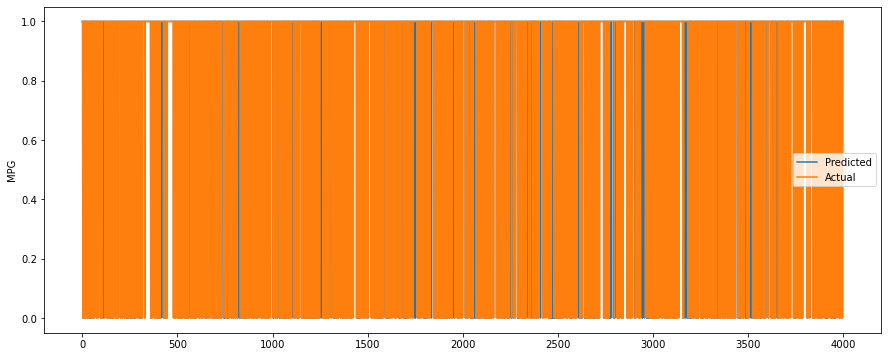

In [17]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 32)

In [19]:
clf

RandomForestClassifier(max_leaf_nodes=32)

In [20]:
def checkAccuracy(clf):
    clf = clf.fit(X_train, Y_train)
    predictions = clf.predict(x_test)
    return accuracy_score(y_test, predictions)

In [24]:
checkAccuracy(clf)    

0.83375

In [1]:
from tensorflow.keras.utils import plot_model
plot_model(clf, to_file='model.png')

NameError: name 'clf' is not defined